In [49]:
from sklearn.datasets import load_digits

digits = load_digits()

In [50]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [51]:
digits.target.shape

(1797,)

In [52]:
digits.data.shape

(1797, 64)

In [53]:
digits.images.shape

(1797, 8, 8)

3


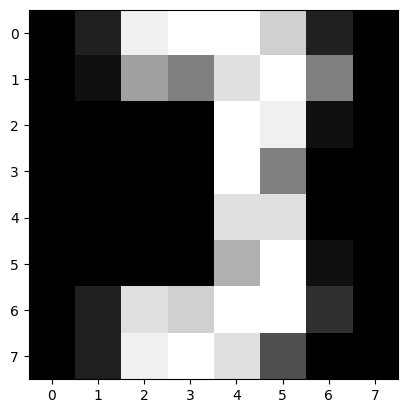

In [54]:
import matplotlib.pyplot as plt

x = digits.images[98]
print(digits.target[98])
plt.gray()
plt.imshow(x)
plt.show()

# Preprocessing

In [55]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(digits.data , digits.target , test_size= 0.3)

In [56]:
x_train[0]

array([ 0.,  0.,  7., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 15., 13.,
        9.,  0.,  0.,  0.,  0., 14.,  8.,  9., 10.,  0.,  0.,  0.,  0.,
        1.,  2.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  6., 15.,
       16.,  5.,  5.,  5.,  0.,  0.,  6., 16., 16., 16., 16., 13.])

# Normalize


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [58]:
x_train[0]

array([0.        , 0.        , 0.4375    , 1.        , 0.8125    ,
       0.125     , 0.        , 0.        , 0.        , 0.        ,
       0.875     , 0.9375    , 0.8125    , 0.5625    , 0.        ,
       0.        , 0.        , 0.        , 0.875     , 0.5       ,
       0.5625    , 0.625     , 0.        , 0.        , 0.        ,
       0.        , 0.0625    , 0.125     , 0.5625    , 0.75      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.8125    , 0.5       , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3125    , 1.        ,
       0.25      , 0.        , 0.        , 0.        , 0.        ,
       0.375     , 0.9375    , 1.        , 0.3125    , 0.3125    ,
       0.38461538, 0.        , 0.        , 0.375     , 1.        ,
       1.        , 1.        , 1.        , 0.8125    ])

# Performance Metric

In [59]:
from sklearn.metrics import accuracy_score , recall_score , precision_score

def calculate_metrics(y_train , y_test , y_pred_train , y_pred_test):

    acc_train = accuracy_score(y_train , y_pred_train)
    acc_test = accuracy_score(y_test , y_pred_test)

    p = precision_score(y_test , y_pred_test , average= 'weighted')
    r = recall_score(y_test , y_pred_test , average= 'weighted')

    print(f"Acc train = {acc_train} , Acc test = {acc_test} , precision test = {p} , recall test = {r}")

    return acc_train , acc_test , p ,r



# Classification

## 1.Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=128 , n_estimators= 256)
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [61]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf , acc_test_rf , p_rf ,r_rf = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 1.0 , Acc test = 0.9777777777777777 , precision test = 0.9778673040053434 , recall test = 0.9777777777777777


## 2.SVM

In [62]:
from sklearn.svm import SVC

svm = SVC(kernel = 'poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [63]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm , acc_test_svm , p_svm ,r_svm = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 0.9992044550517104 , Acc test = 0.9907407407407407 , precision test = 0.9908736171236169 , recall test = 0.9907407407407407


## 3.ANN

In [68]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes = 128 , batch_size= 64 )
ann.fit(x_train , y_train)


MLPClassifier(batch_size=64, hidden_layer_sizes=128)

In [69]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann , acc_test_ann , p_ann ,r_ann = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 1.0 , Acc test = 0.9851851851851852 , precision test = 0.9853499656713068 , recall test = 0.9851851851851852


## 4.KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8 , algorithm = 'kd_tree' , leaf_size = 28)
knn.fit(x_train , y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [71]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn , acc_test_knn , p_knn ,r_knn = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 0.9856801909307876 , Acc test = 0.975925925925926 , precision test = 0.9764316283374969 , recall test = 0.975925925925926


# Comparison

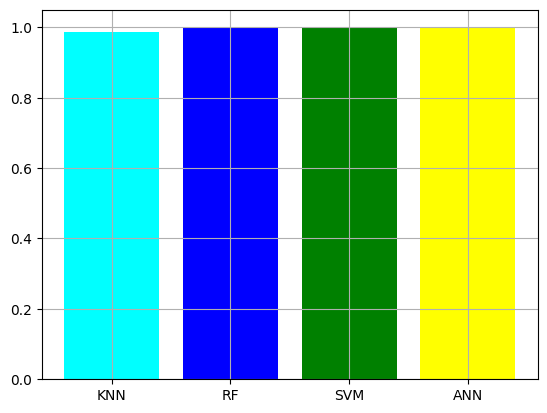

In [72]:
 import matplotlib.pyplot as plt
 
 acc_train = [ acc_train_knn, acc_train_rf , acc_train_svm , acc_train_ann]
 title = [ 'KNN' , 'RF' , 'SVM' , 'ANN']
 color = ['cyan' , 'blue' , 'green' , 'yellow' ]


 plt.bar(title , acc_train , color = color)
 plt.grid()
 plt.show()

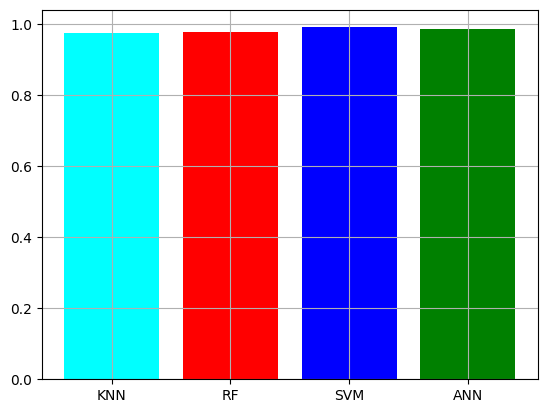

In [73]:
 acc_test = [ acc_test_knn, acc_test_rf , acc_test_svm ,  acc_test_ann]
 title = ['KNN' ,  'RF' , 'SVM' ,  'ANN']
 color = ['cyan' , 'red' , 'blue' , 'green' , ]


 plt.bar(title , acc_test , color = color)
 plt.grid()
 plt.show()

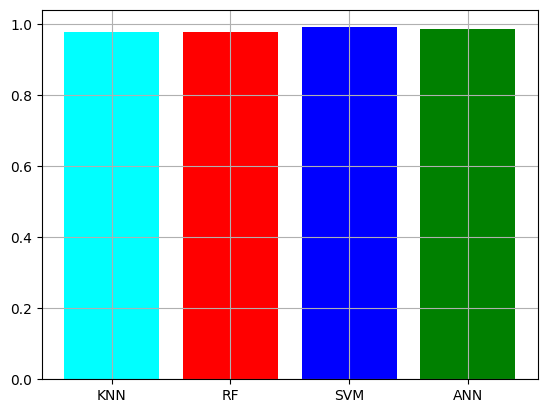

In [74]:
 p_test = [ p_knn, p_rf , p_svm , p_ann]
 title = [ 'KNN' ,  'RF' , 'SVM' ,  'ANN']
 color = ['cyan' , 'red' , 'blue' , 'green' ]


 plt.bar(title , p_test , color = color)
 plt.grid()
 plt.show()

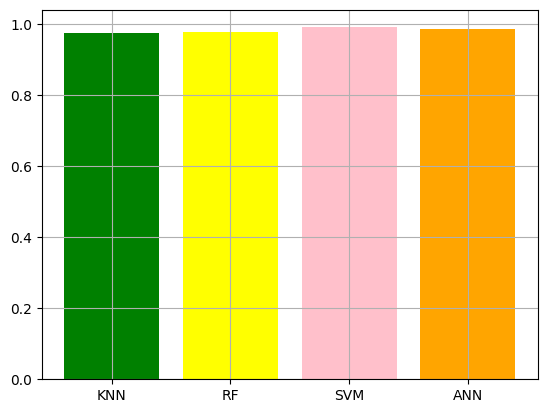

In [75]:
 r_test = [ r_knn, r_rf , r_svm , r_ann]
 title = ['KNN' ,  'RF' , 'SVM' , 'ANN']
 color = [ 'green' , 'yellow' , 'pink' , 'orange']


 plt.bar(title , r_test , color = color)
 plt.grid()
 plt.show()